# Plotting

In [28]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy  as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

- Matplotlib is the most widely used plotting library in the ecosystem of python. In the above cel we loaded matplotlib and the relevant libraries. 

- The easiest way to use `matplotlib` is via pyplot, which allows you to plot 1D and 2D data. Here is a simple example:

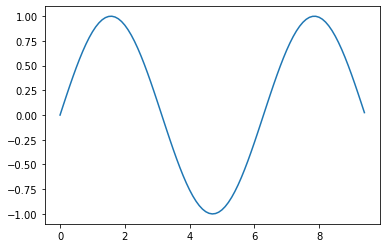

In [3]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

if we want to customize plots it is better to plot by first defining fig and ax objecs which have manuy methods for customizing figure resolution and plot related aspects respecticely. 

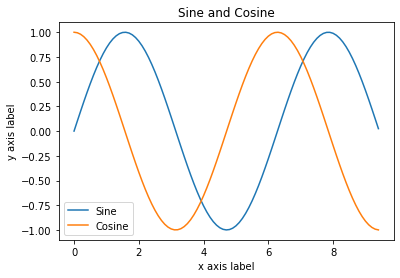

In [4]:
fig, ax = plt.subplots()

y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
ax.plot(x, y_sin)
ax.plot(x, y_cos)

# Specify labels
ax.set_xlabel('x axis label')
ax.set_ylabel('y axis label')
ax.set_title('Sine and Cosine')
ax.legend(['Sine', 'Cosine'])

#fig.savefig("myfig.pdf")

## A gallery of useful examples

**For a greater variety of plotting examples check out [Matploltib Gallery!](https://matplotlib.org/3.1.1/gallery/index.html)**

1D plotting is conveniently done by creating fig and ax objects which allow coutom styling plots and figure properties separately. 

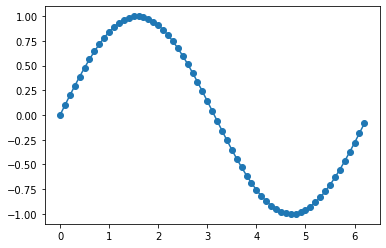

In [5]:
fig, ax = plt.subplots()          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values via np.arange or np.linspace

s = np.sin(t)                     # create y values

ax.plot(t, s, '-o')                     # make the plot

#fig.savefig('myFIG.png')         # save figure

#### fig and ax objects
For customizing plots it is more convenient to define **fig** and **ax** objects.  One can then use ax object to make veriety of subplots then use fig to save the entire figure as one pdf. Try changing fig size, number of columns and rows.

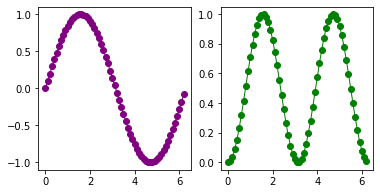

In [6]:
t = np.arange(0.0,  2*np.pi, 0.1) # create x values
s = np.sin(t)                     # create y values

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))          

ax[0].plot(t, s,'-o', color='purple', lw=1.0)  # plot on subplot-1
ax[1].plot(t, s**2,'-o', color='green',  lw=1.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

### Plotting in 2D and 3D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

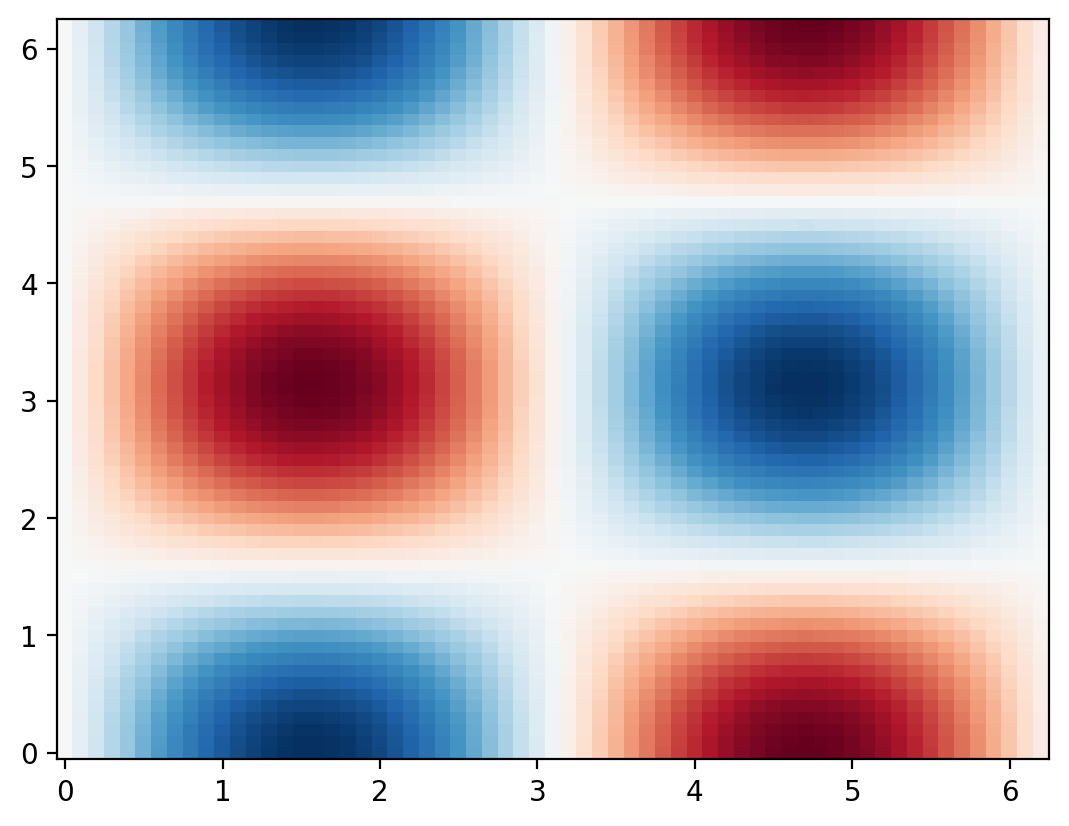

In [11]:
x = np.arange(0.0,  2*np.pi, 0.1)   # create x values
y = np.arange(0.0,  2*np.pi, 0.1)   # create y values

X, Y = np.meshgrid(x,y)             # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

fig, ax = plt.subplots()            # Create fig and ax objects
ax.pcolor(X, Y, Z,cmap='RdBu')      # try also ax.contour, ax.contourf 

Making the 3D plot requires specifying 3d projection in matplotlib

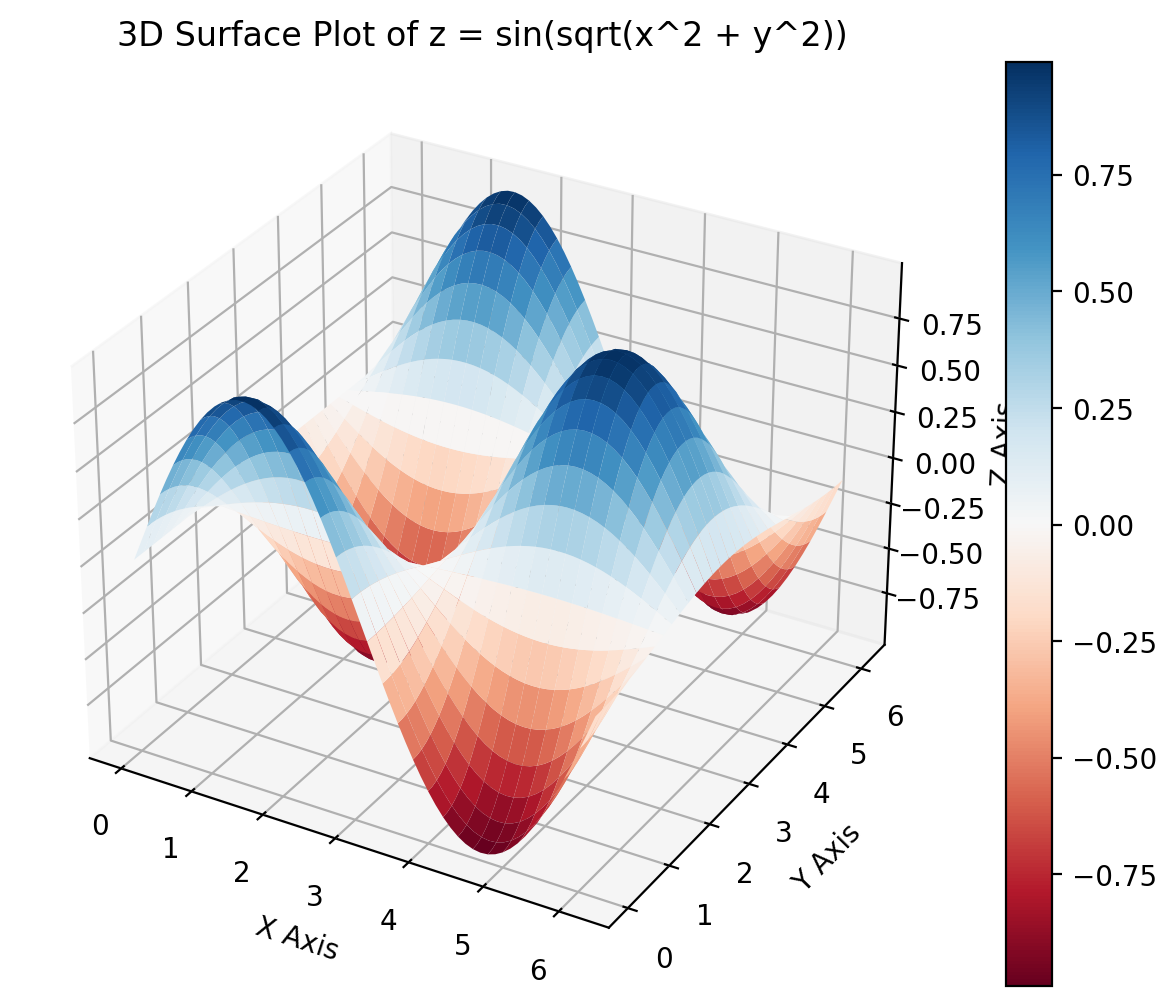

In [24]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # tells the plot to render in 3D

surf = ax.plot_surface(X, Y, Z, cmap='RdBu')

# Setting the layout
ax.set_title('3D Surface Plot of z = sin(sqrt(x^2 + y^2))')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
fig.colorbar(surf)

plt.show()

### Create interactive plots using Plotly 

- For instance the previous 3D plot is generated using **Plotly** allowing you to rotate and interact with the surface

In [27]:
# Creating the 3D surface plot
surface_plot = go.Surface(z=Z, x=X, y=Y)

# Add plot to figure and specify labels
fig = go.Figure(data=[surface_plot])

fig.update_layout(title='3D Surface Plot',
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                  ))

fig.show()

### Plotting histograms

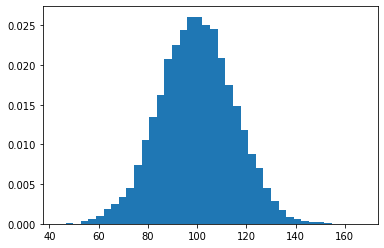

In [11]:
# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Plot 1D histogram of the data
plt.hist(x, bins=40, density=True);

## Widgets

Suppose we would like to explore how the variation of parameter $\lambda$ affects the following function of a standing wave:

$$f(x) = sin (\omega \cdot x +p)$$

- Make a python-function which creates a plot as a function of a parameter(s) of interest.

- Add an interactive widget on top to vary the parameter.

In [1]:
from ipywidgets import interact, interactive

In [16]:
 def plot_wave(phase, freq):          
    
    x  = np.linspace(0,10,1000)
    y  = np.sin(freq*x+phase)
        
    plt.plot(x, y)
    plt.show()

In [17]:
interactive(plot_wave, 
            phase=(0,2*np.pi), 
            freq=(0.1,5))

interactive(children=(FloatSlider(value=3.141592653589793, description='phase', max=6.283185307179586), FloatS…

Here is another example combining interactive plotly plot with ipywidget slider

In [13]:
def plot_sine_wave(frequency=1.0):
    
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(frequency * x)
    
    trace  = go.Scatter(x=x, y=y, mode='lines')
    layout = go.Layout(title=f'Sine Wave with Frequency = {frequency} Hz')
    
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()
    
interact(plot_sine_wave, frequency=(0.5, 5, 0.1))

interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=0.5), Output()), _dom_class…

<function __main__.plot_sine_wave(frequency=1.0)>

## Additional resoruces. 

Matplotlib has a huge scientific user base. This means that you can always find a good working template of any kind of visualization which you want to make. With basic understanding of matplotlib and some solid googling skills you can go very far. Here are some additional resources that you may find helpful

- [Matplotlib](https://matplotlib.org/index.html)

- [Matplotlib Book](https://hal.inria.fr/hal-03427242/document)

- [Matplotlib Blog](https://matplotlib.org/matplotblog/)

- [PyViz universe](https://pyviz.org/index.html)

- [The Python Graph Gallery](https://python-graph-gallery.com/)